Quiz Title: Bitcoin Price Forecasting with ARIMA

Quiz Description:

First collect bitcoin price from 2022-01-01T00:00:00Z till 2022-12-01T23:59:59Z within 1 hour interval you can use wallex or nobitex or coinbase.com or ...

Then Your task is to use the ARIMA (AutoRegressive Integrated Moving Average) model to forecast the price of Bitcoin for a future period accoarding to data that you collected.

Question 1: Perform a visual analysis of the dataset. Plot the time series of Bitcoin prices over the 12 months.

Question 2: Before applying ARIMA, what steps would you take to make the time series stationary? Do them all

Question 3: Apply the ARIMA model to the dataset. Choose appropriate values for p, d, and q.

Question 4: Forecast the Bitcoin price for the next 3 hours using your ARIMA model.

Question 5: Evaluate the performance of your ARIMA model. Calculate and explain appropriate evaluation metrics such as Mean Absolute Error (MAE) and Root Mean Squared Error (RMSE) for your forecast.

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA

In [2]:
df = yf.download('BTC-USD',start='2022-01-01',end='2022-12-01',interval='1h')

[*********************100%%**********************]  1 of 1 completed


In [5]:
df

,Open,High,Low,Close,Adj Close,Volume
Datetime,,,,,,
2022-01-01 00:00:00+00:00,46311.746094,46726.558594,46288.484375,46726.558594,46726.558594,0
2022-01-01 01:00:00+00:00,46723.667969,46888.292969,46650.351562,46788.546875,46788.546875,56967168
2022-01-01 02:00:00+00:00,46798.843750,46914.199219,46792.679688,46847.390625,46847.390625,0
2022-01-01 03:00:00+00:00,46836.500000,46861.910156,46800.742188,46833.105469,46833.105469,0
2022-01-01 04:00:00+00:00,46831.148438,46878.140625,46703.164062,46778.796875,46778.796875,81956864
...,...,...,...,...,...,...
2022-11-30 19:00:00+00:00,16915.728516,17094.998047,16915.728516,17047.300781,17047.300781,1430200320
2022-11-30 20:00:00+00:00,17047.664062,17072.748047,17045.443359,17057.892578,17057.892578,243539968
2022-11-30 21:00:00+00:00,17064.076172,17089.828125,17044.115234,17089.828125,17089.828125,438796288


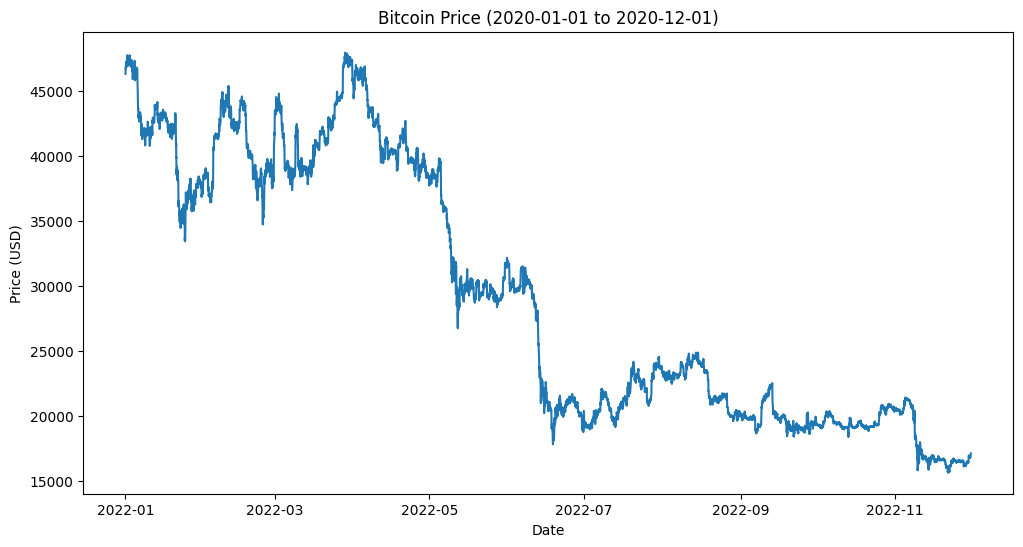

In [6]:
plt.figure(figsize=(12, 6))
plt.plot(df["Open"])
plt.title('Bitcoin Price (2020-01-01 to 2020-12-01)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.show()

In [8]:
lag_acf = acf(df["Open"], nlags=50)
lag_pacf = pacf(df["Open"], nlags=50, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

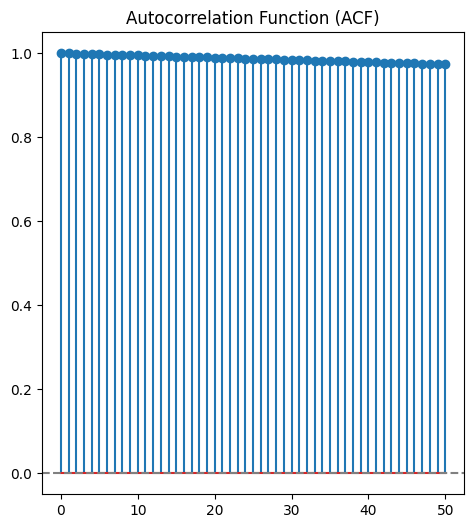

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.stem(range(51), lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Autocorrelation Function (ACF)')

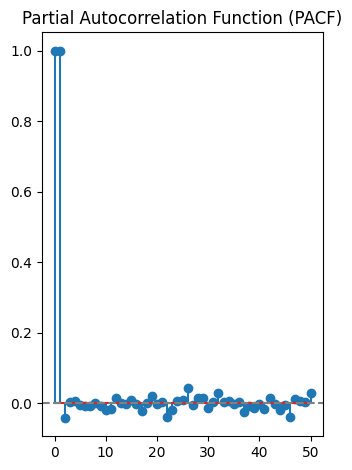

In [10]:
plt.subplot(122)
plt.stem(range(51), lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [11]:
df_0 = df["Open"].diff().dropna()

In [13]:
lag_acf = acf(df_0, nlags=50)
lag_pacf = pacf(df_0, nlags=50, method='ols')

Text(0.5, 1.0, 'Autocorrelation Function (ACF)')

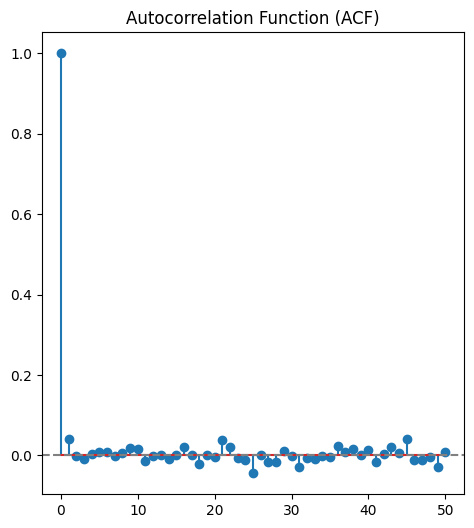

In [14]:
plt.figure(figsize=(12, 6))
plt.subplot(121)
plt.stem(range(51), lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Autocorrelation Function (ACF)')

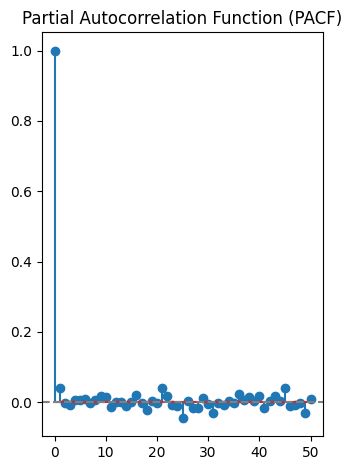

In [15]:
plt.subplot(122)
plt.stem(range(51), lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.title('Partial Autocorrelation Function (PACF)')
plt.tight_layout()
plt.show()

In [16]:
p, d, q = 1, 1, 1  
model = ARIMA(df_0, order=(p, d, q))
model_fit = model.fit()


c:\Users\jrahm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jrahm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\jrahm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


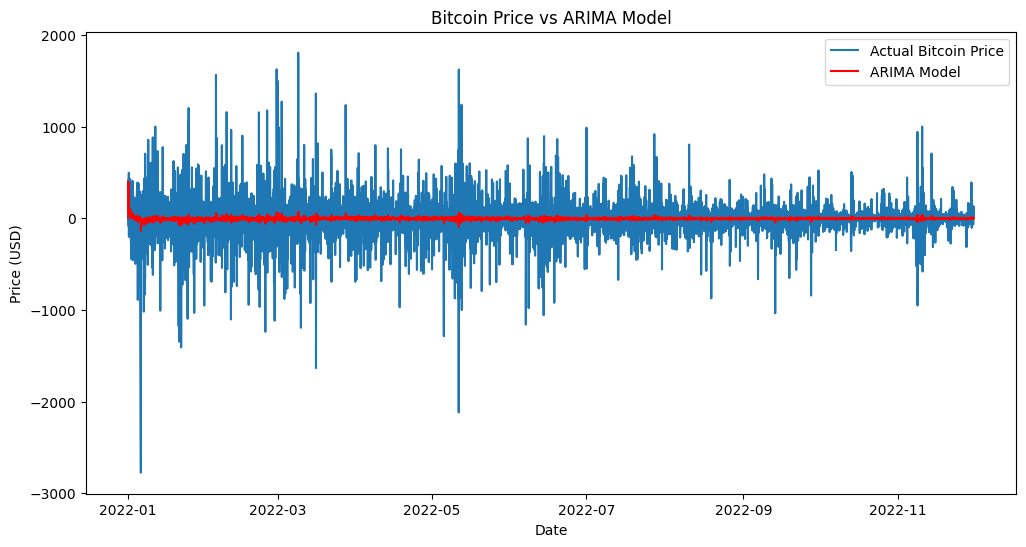

In [18]:
plt.figure(figsize=(12, 6))
plt.plot(df_0, label='Actual Bitcoin Price')
plt.plot(model_fit.fittedvalues, color='red', label='ARIMA Model')
plt.title('Bitcoin Price vs ARIMA Model')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.show()

In [21]:
forecast_steps = 3
forecast, stderr, conf_int = model_fit.forecast(steps=forecast_steps)

                           Forecasted Price
2022-12-01 00:00:00+00:00         -1.388743
2022-12-01 01:00:00+00:00         -1.388743
2022-12-01 02:00:00+00:00         -1.388743


c:\Users\jrahm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\jrahm\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [22]:
last_observation_time = df_0.index[-1]
forecast_time_index = pd.date_range(start=last_observation_time, periods=forecast_steps + 1, freq='H')[1:]
forecast_df = pd.DataFrame({'Forecasted Price': forecast}, index=forecast_time_index)

In [23]:
print(forecast_df)

                           Forecasted Price
2022-12-01 00:00:00+00:00         -1.388743
2022-12-01 01:00:00+00:00         -1.388743
2022-12-01 02:00:00+00:00         -1.388743


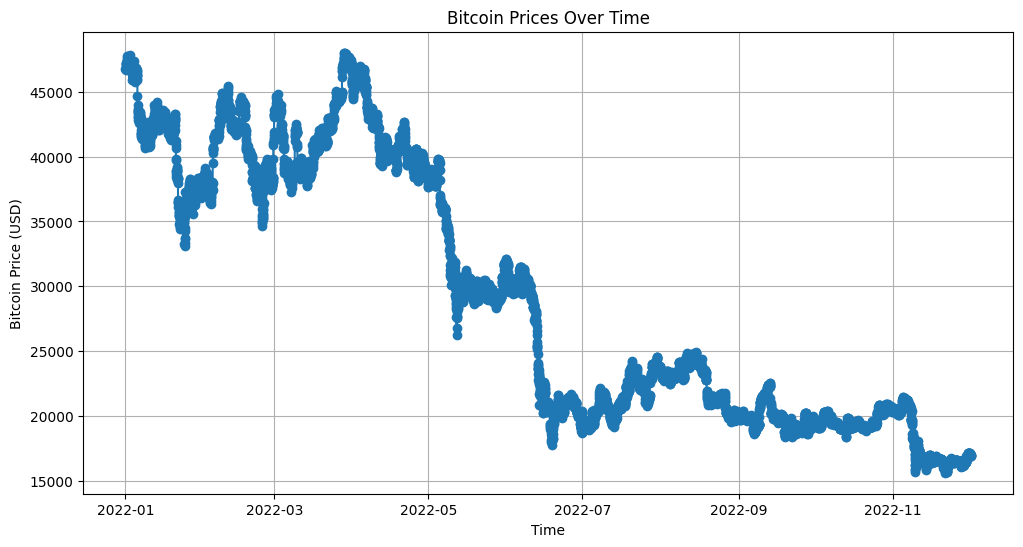

<Figure size 1200x600 with 0 Axes>

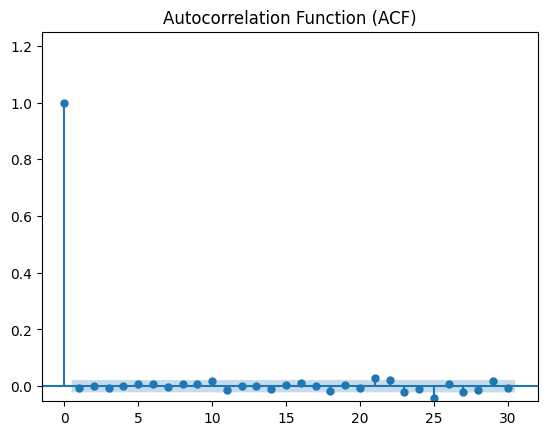

<Figure size 1200x600 with 0 Axes>

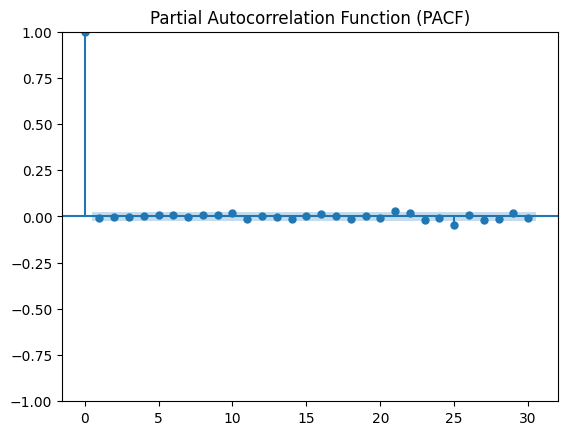

Forecas
8040    16980.024118
dtype: float64
Forecas
8040    16980.024118
dtype: float64
Forecas
8040    16980.024118
dtype: float64
Forecast for the next 3 hour (USD):
[8040    16980.024118
dtype: float64, 8040    16980.024118
dtype: float64, 8040    16980.024118
dtype: float64]
[16923.77 16967.91 16980.08]

Model Evaluation:
hour 1:
MAE: 56.25 USD
RMSE: 56.25 USD
hour 2:
MAE: 12.11 USD
RMSE: 12.11 USD
hour 3:
MAE: 0.06 USD
RMSE: 0.06 USD
